In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
from src.loaders import *
import os
import pandas as pd
import cartopy.crs as ccrs

In [2]:
datadir = '/dat1/smart1n/SWOT/data/SWOT_L3_LR_SSH_EXPERT_1.0.2/'
start = np.datetime64("2024-01-30T00:00:00")
end = np.datetime64("2024-01-31T00:00:00")

In [3]:
data = SWOT_L3_Dataset(datadir, start, end)

In [6]:
data.ds

<xarray.Dataset> Size: 783MB
Dimensions:       (num_lines: 276080, num_pixels: 69)
Coordinates:
    latitude      (num_lines, num_pixels) float64 152MB 78.27 78.25 ... -78.27
    longitude     (num_lines, num_pixels) float64 152MB 97.26 97.26 ... 261.7
  * num_lines     (num_lines) int64 2MB 0 1 2 3 ... 276076 276077 276078 276079
  * num_pixels    (num_pixels) int64 552B 0 1 2 3 4 5 6 ... 62 63 64 65 66 67 68
Data variables:
    ssha          (num_lines, num_pixels) float64 152MB nan nan nan ... nan nan
    mdt           (num_lines, num_pixels) float64 152MB -0.1358 ... -1.109
    time          (num_lines, num_pixels) datetime64[ns] 152MB 2024-01-29T23:...
    quality_flag  (num_lines, num_pixels) uint8 19MB 102 100 100 ... 102 102 102
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    geospatial_lat_units:            degrees_north
    ...                              ...
    geospatial_lon_max:              264.188223
    date_modified:                   2024-08-07T07:34:54Z
    history:                         2024-08-07T07:34:54Z: Created by DUACS K...
    date_created:                    2024-08-07T07:34:54Z
    date_issued:                     2024-08-07T07:34:54Z
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0 (NASA/CNE...

In [5]:
subset = data.subset(lon_min = 150, lon_max = 170, lat_min = 20, lat_max = 40)

ValueError: conflicting sizes for dimension 'num_lines': length 1 on the data but length 276080 on coordinate 'longitude'

In [10]:
length = 50000
start = 0#50000
end = start + length
ds_basic = data.ds.isel(num_lines = slice(start, end))

In [ ]:
ds_basic

(20.0, 50.0)

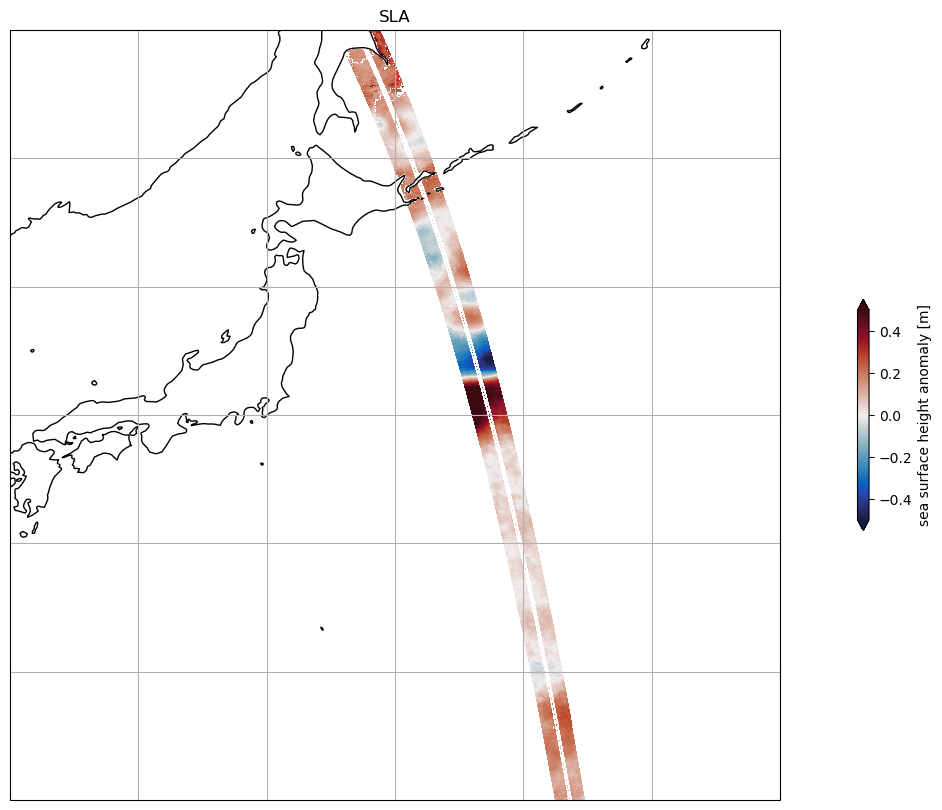

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap=cmocean.cm.balance,
    vmin=-0.5,
    vmax=0.5,
    cbar_kwargs={"shrink": 0.3},)

# SWOT KaRIn SLA plots
ds_basic.ssha.plot.pcolormesh(ax=ax, **plot_kwargs)

#
ax.set_title("SLA")
ax.coastlines()
ax.gridlines()
ax.set_xlim([130,160])
ax.set_ylim([20,50])


In [19]:
import zarr

In [21]:
d = zarr.open('/dat1/smart1n/SWOT_super_resolution/input_data/swot_karin_obs_swot_SR_SNP.zarr', mode = 'r')
d

<zarr.core.Array (418, 66, 128, 128) float64 read-only>

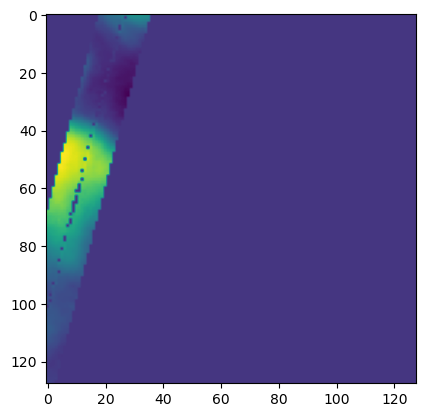

In [29]:
plt.imshow(d[0,32,])

In [5]:
files = sorted(os.listdir(datadir))
files = [f for f in files if '.nc' in f]

In [21]:
f = files[13909]
string = f[len(file_prefix):len(file_prefix)+15]
time = pd.to_datetime(string, format="%Y%m%dT%H%M%S", errors='coerce', yearfirst=True, utc=True)
d = np.datetime64(time)

/tmp/ipykernel_263328/946929258.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = np.datetime64(time)


In [8]:
file_prefix = 'SWOT_L3_LR_SSH_Expert_XXX_YYY_'

In [6]:
files[-1]

'SWOT_L3_LR_SSH_Expert_578_004_20230710T082100_20230710T091205_v1.0.2.nc'

In [22]:
file_prefix = 'SWOT_L3_LR_SSH_Expert_XXX_YYY_'
for i, f in enumerate(files):
    if i %100 == 0:
        print(i)
    string = f[len(file_prefix):len(file_prefix)+15]
    time = pd.to_datetime(string, format="%Y%m%dT%H%M%S", errors='coerce', yearfirst=True, utc=True)
    d = np.datetime64(time)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900


/tmp/ipykernel_263328/1323566135.py:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = np.datetime64(time)


In [8]:
time = pd.to_datetime(string, format="%Y%m%dT%H%M%S", errors='coerce', yearfirst=True, utc=True)
np.datetime64(time)

/tmp/ipykernel_261373/2990920621.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  np.datetime64(time)


numpy.datetime64('2023-07-30T02:12:39.000000')